In [2]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook
# !pip install fastai --upgrade

In [3]:
import fastbook
# fastbook.setup_book() # to connect the colab notebook to google drive using an authentication token
from fastai.vision.all import *

In [4]:
import numpy as np

In [5]:
data = [[1,2,3,],[4,5,6]]
arr = array(data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
tns.type()

'torch.LongTensor'

In [8]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [9]:
from PIL import Image

In [10]:
threes_t = (path/'train'/'3').ls().sorted()
sevens_t = (path/'train'/'7').ls().sorted()
three_tensors_t = [tensor(Image.open(o)) for o in threes_t]
seven_tensors_t = [tensor(Image.open(o)) for o in sevens_t]
stacked_threes_t = torch.stack(three_tensors_t).float() / 255
stacked_sevens_t = torch.stack(seven_tensors_t).float() / 255

threes_v = (path/'valid'/'3').ls().sorted()
sevens_v = (path/'valid'/'7').ls().sorted()
three_tensors_v = [tensor(Image.open(o)) for o in threes_v]
seven_tensors_v = [tensor(Image.open(o)) for o in sevens_v]
stacked_threes_v = torch.stack(three_tensors_v).float() / 255
stacked_sevens_v = torch.stack(seven_tensors_v).float() / 255

mean3 = stacked_threes_t.mean(0)
mean7 = stacked_sevens_t.mean(0)

In [11]:
# mean absolute difference
def mnist_distance(a, b): return (a - b).abs().mean((-1, -2))

In [12]:
a_3 = stacked_threes_t[1]
mnist_distance(a_3, mean3)

tensor(0.1114)

In [13]:
# use broadcasting
valid_3_dist = mnist_distance(stacked_threes_v, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [14]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [15]:
accuracy_3s = is_3(stacked_threes_v).float().mean()
accuracy_7s = (1 - is_3(stacked_sevens_v).float()).mean()
(accuracy_3s + accuracy_7s) / 2

tensor(0.9511)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  


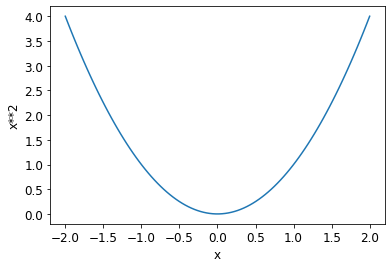

In [16]:
import matplotlib.pyplot as plt

def f(x): return x**2

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
    
plot_function(f, 'x', 'x**2')

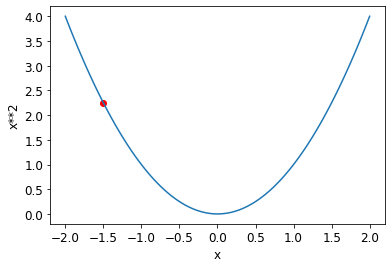

In [17]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')


In [18]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()

In [19]:
xt.grad

tensor(6.)

In [37]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

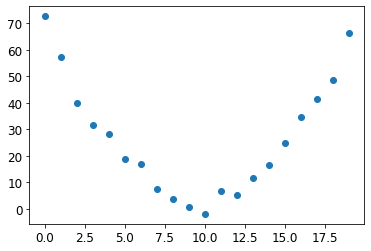

In [38]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [39]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [40]:
params = torch.randn(3).requires_grad_()

In [41]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [42]:
preds = f(time, params)

In [43]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed) # speed was defined
    ax.scatter(time, to_np(preds), color='red')
    # ax.set_ylim(-300, 100)


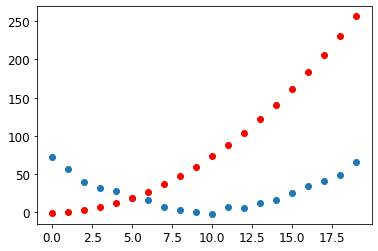

In [44]:
show_preds(preds)

In [45]:
loss = mse(preds, speed)
loss

tensor(100.9353, grad_fn=<SqrtBackward0>)

In [46]:
loss.backward()
params.grad

tensor([162.1273,  10.4073,   0.6192])

In [47]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None
params 

tensor([ 0.6847,  0.4678, -0.2049], requires_grad=True)

In [48]:
# 두 번째 학습
preds = f(time, params)
mse(preds, speed)

tensor(100.6713, grad_fn=<SqrtBackward0>)

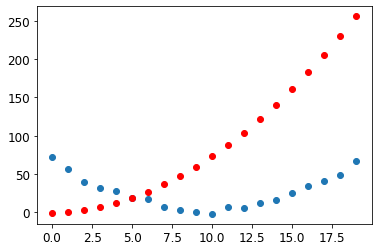

In [49]:
show_preds(preds)

In [51]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(type(loss)) 
        print(loss.item())
    return preds

In [52]:
for i in range(10): apply_step(params)

<class 'torch.Tensor'>
100.67133331298828
<class 'torch.Tensor'>
100.40753173828125
<class 'torch.Tensor'>
100.14381408691406
<class 'torch.Tensor'>
99.88019561767578
<class 'torch.Tensor'>
99.61668395996094
<class 'torch.Tensor'>
99.35326385498047
<class 'torch.Tensor'>
99.0899429321289
<class 'torch.Tensor'>
98.82672119140625
<class 'torch.Tensor'>
98.5636215209961
<class 'torch.Tensor'>
98.30060577392578


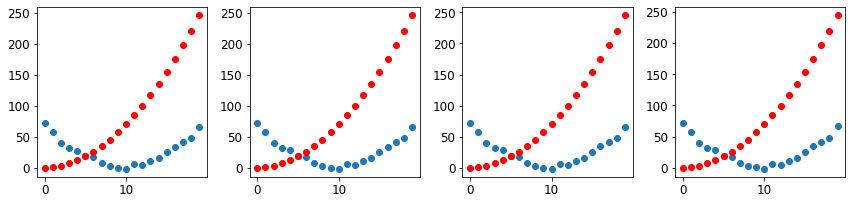

In [56]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [68]:
train_x = torch.cat([stacked_threes_t, stacked_sevens_t])
train_x.shape

torch.Size([12396, 28, 28])

In [69]:
train_x = train_x.view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [70]:
train_y = tensor([1]*len(threes_t) + [0]*len(sevens_t)).unsqueeze(1)
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [71]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [72]:
valid_x = torch.cat([stacked_threes_v, stacked_sevens_v]).view(-1, 28*28)
valid_y = tensor([1]*len(threes_v) + [0]*len(sevens_v)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [85]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))
bias = init_params(1)

In [86]:
bias.shape

torch.Size([1])

In [87]:
(train_x[0]*weights.T).sum() + bias

tensor([10.4040], grad_fn=<AddBackward0>)

In [89]:
def linear1(xb): return xb @ weights + bias
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [90]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [ True]])

In [91]:
corrects.float().mean().item()

0.5586479306221008

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

!git config --global user.email 'intaek428@gmail.com'
!git config --global user.name 'ITHwang'

!git add .
!git commit -m '4.5.1까지'
!git push